<a href="https://colab.research.google.com/github/danielnachshoni/deepLearningOneNet/blob/main/DaniOneNetnoam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 677 (delta 48), reused 48 (delta 48), pack-reused 625
Receiving objects: 100% (677/677), 1.53 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [18]:
cd OneNet

/content/OneNet/OneNet


#  installing torchvison according to your cuda version

In [19]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [20]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


# restart runtime after installing

In [21]:
!pip install pyyaml==5.1 pycocotools>=2.0.1

In [22]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.1+cu101 True


# install onenet

In [23]:
!python setup.py build develop

running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/defaults.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/compat.py -> build/lib.linux-x86_64-3.7/detectron2/config
copying detectron2/config/config.py -> build/lib.linux-x86_64-3.7/detectron2/config
creating build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/events.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/memory.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/comm.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/utils
copying detectron2/utils

# link coco datset to OneNet dateset folder
## download COCO dataset and then link the folder with OneNet

In [24]:
!mkdir -p datasets/coco
!ln -s /path_to_coco_dataset/annotations datasets/coco/annotations
!ln -s /path_to_coco_dataset/train2017 datasets/coco/train2017
!ln -s /path_to_coco_dataset/val2017 datasets/coco/val2017

In [25]:
!pip install -U iopath

# train ONeNet

In [26]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=False, machine_rank=0, num_gpus=1, num_machines=1, opts=[], resume=False)
[04/28 09:00:05 detectron2]: Rank of current process: 0. World size: 1
[04/28 09:00:05 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
to

# Evaluate

In [27]:
!python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --eval-only MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

Command Line Args: Namespace(config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', dist_url='tcp://127.0.0.1:49152', eval_only=True, machine_rank=0, num_gpus=1, num_machines=1, opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], resume=False)
[04/28 09:00:19 detectron2]: Rank of current process: 0. World size: 1
[04/28 09:00:20 detectron2]: Environment info:
----------------------  ---------------------------------------------------------------
sys.platform            linux
Python                  3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
numpy                   1.21.6
detectron2              0.3 @/content/OneNet/OneNet/detectron2
Compiler                GCC 7.5
CUDA compiler           CUDA 11.1
detectron2 arch flags   3.7
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1+cu101 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME             

# Visualize
install opencv additinoally for visualize

In [28]:
# !python demo/demo.py\
#     --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
#     --input path/to/images --output path/to/save_images --confidence-threshold 0.4 \
#     --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/dog.jpg --output /content/result1.jpg --confidence-threshold 0.1 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

!python demo/demo.py\
    --config-file projects/OneNet/configs/onenet.res18.dcn.yaml \
    --input /content/catnip-cats9.jpg --output /content/result2.jpg --confidence-threshold 0.2 \
    --opts MODEL.WEIGHTS /content/model_onenet_r18dcn.pth

[04/28 09:00:30 detectron2]: Arguments: Namespace(confidence_threshold=0.1, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/dog.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/result1.jpg', video_input=None, webcam=False)
[04/28 09:00:33 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/28 09:00:33 detectron2]: /content/dog.jpg: detected 7 instances in 0.14s
100% 1/1 [00:00<00:00,  3.56it/s]
[04/28 09:00:35 detectron2]: Arguments: Namespace(confidence_threshold=0.2, config_file='projects/OneNet/configs/onenet.res18.dcn.yaml', input=['/content/catnip-cats9.jpg'], opts=['MODEL.WEIGHTS', '/content/model_onenet_r18dcn.pth'], output='/content/result2.jpg', video_input=None, webcam=False)
[04/28 09:00:37 fvcore.common.checkpoint]: [Checkpointer] Loading from /content/model_onenet_r18dcn.pth ...
  0% 0/1 [00:00<?, ?it/s][04/28 09:00:38 detectron2]: /content/

In [29]:
import torch, torchvision
from IPython.display import Image
from IPython.display import display

# print(torch._version_, torch.cuda.is_available())
torch.cuda.is_available()

True

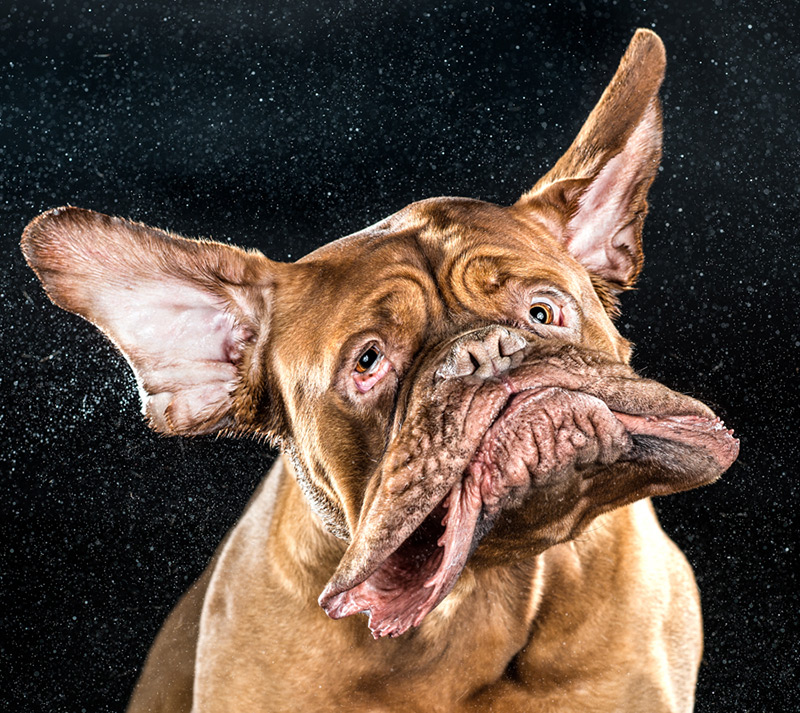

In [30]:
x = Image(filename='/content/dog.jpg') 
display(x)

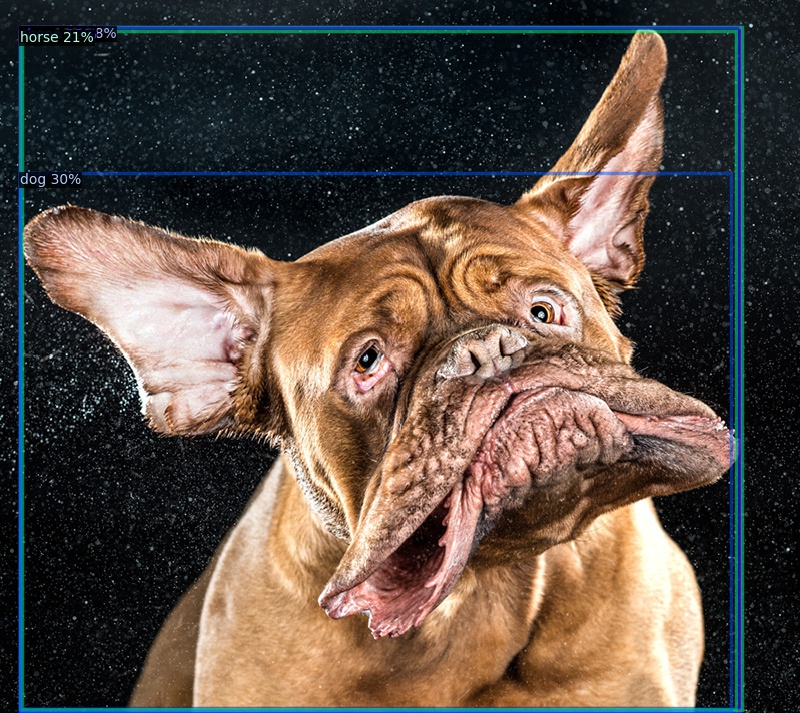

In [31]:
x = Image(filename='/content/result1.jpg') 
display(x)